# Week 2: Day 5 AM // Math: Multivariate Calculus

## Partial derivatives

Up to now, we have only considered functions with a single variable $x$. What happens when there are multiple variables? For example, let's start with a simple function with 2 variables: $f(x,y)=\sin(xy)$. If we plot this function, using $z=f(x,y)$, we get the following 3D graph. I also plotted some point $\mathrm{A}$ on the surface, along with two lines I will describe shortly.

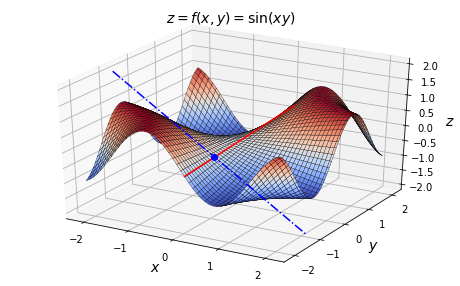

In [12]:
#@title
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(f, title):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')

    xs = np.linspace(-2.1, 2.1, 100)
    ys = np.linspace(-2.1, 2.1, 100)
    xs, ys = np.meshgrid(xs, ys)
    zs = f(xs, ys)

    surface = ax.plot_surface(xs, ys, zs,
                              cmap=mpl.cm.coolwarm,
                              linewidth=0.3, edgecolor='k')

    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$y$", fontsize=14)
    ax.set_zlabel("$z$", fontsize=14)
    ax.set_title(title, fontsize=14)
    return ax

def plot_tangents(ax, x_A, y_A, f, df_dx, df_dy):
    ax.plot3D([x_A], [y_A], f(x_A, y_A), "bo", zorder=10)
    x_min, x_max = -2.1, 2.1
    slope_x = df_dx(x_A, y_A)
    offset_x = f(x_A, y_A) - slope_x * x_A
    ax.plot3D([x_min, x_max], [y_A, y_A],
              [slope_x * x_min + offset_x, slope_x * x_max + offset_x], "b-.",
              zorder=5)
    y_min, y_max = -2.1, 2.1
    slope_y = df_dy(x_A, y_A)
    offset_y = f(x_A, y_A) - slope_y * y_A
    ax.plot3D([x_A, x_A], [y_min, y_max],
              [slope_y * y_min + offset_y, slope_y * y_max + offset_y], "r-",
              zorder=5)

def f(x, y):
    return np.sin(x * y)

def df_dx(x, y):
    return y * np.cos(x * y)

def df_dy(x, y):
    return x * np.cos(x * y)

ax = plot_3d(f, r"$z = f(x, y) = \sin(xy)$")
plot_tangents(ax, 0.1, -1, f, df_dx, df_dy)

plt.show()

If you were to stand on this surface at point $\mathrm{A}$ and walk along the $x$ axis towards the right (increasing $x$), your path would go down quite steeply (along the dashed blue line). The slope along this axis would be negative. However, if you were to walk along the $y$ axis, towards the back (increasing $y$), then your path would almost be flat (along the solid red line), at least locally: the slope along that axis, at point $\mathrm{A}$, would be very slightly positive.

As you can see, a single number is no longer sufficient to describe the slope of the function at a given point. We need one slope for the $x$ axis, and one slope for the $y$ axis. One slope for each variable. To find the slope along the $x$ axis, called the **partial derivative of $f$ with regards to $x$**, and noted $\dfrac{\partial f}{\partial x}$ (with curly $\partial$), we can differentiate $f(x,y)$ with regards to $x$ while treating all other variables (in this case just $y$) as constants:

$ \dfrac{\partial f}{\partial x} = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon, y) - f(x,y)}{\epsilon}$

If you use the derivative rules listed earlier (in this example you would just need the product rule and the chain rule), making sure to treat $y$ as a constant, then you will find:

$ \dfrac{\partial f}{\partial x} = y\cos(xy)$

Similarly, the partial derivative of $f$ with regards to $y$ is defined as:

$ \dfrac{\partial f}{\partial y} = \underset{\epsilon \to 0}\lim\dfrac{f(x, y+\epsilon) - f(x,y)}{\epsilon}$

All variables except for $y$ are treated like constants (just $x$ in this example). Using the derivative rules, we get:

$ \dfrac{\partial f}{\partial y} = x\cos(xy)$

We now have equations to compute the slope along the $x$ axis and along the $y$ axis. But what about the other directions? If you were standing on the surface at point $\mathrm{A}$, you could decide to walk in any direction you choose, not just along the $x$ or $y$ axes. What would the slope be then? Shouldn't we compute the slope along every possible direction?

Well, it can be shown that if all the partial derivatives are defined and continuous in a neighborhood around point $\mathrm{A}$, then the function $f$ is **totally differentiable** at that point, meaning that it can be locally approximated by a plane $P_\mathrm{A}$ (the tangent plane to the surface at point $\mathrm{A}$). In this case, having just the partial derivatives along each axis ($x$ and $y$ in our case) is sufficient to perfectly characterize that plane. Its equation is:

$z = f(x_\mathrm{A},y_\mathrm{A}) + (x - x_\mathrm{A})\dfrac{\partial f}{\partial x}(x_\mathrm{A},y_\mathrm{A}) + (y - y_\mathrm{A})\dfrac{\partial f}{\partial y}(x_\mathrm{A},y_\mathrm{A})$

In Deep Learning, we will generally be dealing with well-behaved functions that are totally differentiable at any point where all the partial derivatives are defined, but you should know that some functions are not that nice. For example, consider the function:

$h(x,y)=\begin{cases}0 \text { if } x=0 \text{ or } y=0\\1 \text { otherwise}\end{cases}$

At the origin (i.e., at $(x,y)=(0,0)$), the partial derivatives of the function $h$ with respect to $x$ and $y$ are both perfectly defined: they are equal to 0. Yet the function can clearly not be approximated by a plane at that point. It is not totally differentiable at that point (but it is totally differentiable at any point off the axes).


## Gradients

So far we have considered only functions with a single variable $x$, or with 2 variables, $x$ and $y$, but the previous paragraph also applies to functions with more variables. So let's consider a function $f$ with $n$ variables: $f(x_1, x_2, \dots, x_n)$. For convenience, we will define a vector $\mathbf{x}$ whose components are these variables:

$\mathbf{x}=\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}$ 

Now $f(\mathbf{x})$ is easier to write than $f(x_1, x_2, \dots, x_n)$.

The gradient of the function $f(\mathbf{x})$ at some point $\mathbf{x}_\mathrm{A}$ is the vector whose components are all the partial derivatives of the function at that point. It is noted $\nabla f(\mathbf{x}_\mathrm{A})$, or sometimes $\nabla_{\mathbf{x}_\mathrm{A}}f$:

$\nabla f(\mathbf{x}_\mathrm{A}) = \begin{pmatrix}
\dfrac{\partial f}{\partial x_1}(\mathbf{x}_\mathrm{A})\\
\dfrac{\partial f}{\partial x_2}(\mathbf{x}_\mathrm{A})\\
\vdots\\\
\dfrac{\partial f}{\partial x_n}(\mathbf{x}_\mathrm{A})\\
\end{pmatrix}$

Assuming the function is totally differentiable at the point $\mathbf{x}_\mathbf{A}$, then the surface it describes can be approximated by a plane at that point (as discussed in the previous section), and the gradient vector is the one that points towards the steepest slope on that plane.

### Gradient Descent, revisited

In Deep Learning, the Gradient Descent algorithm we discussed earlier is based on gradients instead of derivatives (hence its name). It works in much the same way, but using vectors instead of scalars: simply start with a random vector $\mathbf{x}_0$, then compute the gradient of $f$ at that point, and perform a small step in the opposite direction, then repeat until convergence. More precisely, at each step $t$, compute $\mathbf{x}_t = \mathbf{x}_{t-1} - \eta \nabla f(\mathbf{x}_{t-1})$. The constant $\eta$ is the learning rate, typically a small value such as $10^{-3}$. In practice, we generally use more efficient variants of this algorithm, but the general idea remains the same.

In Deep Learning, the letter $\mathbf{x}$ is generally used to represent the input data. When you _use_ a neural network to make predictions, you feed the neural network the inputs $\mathbf{x}$, and you get back a prediction $\hat{y} = f(\mathbf{x})$. The function $f$ treats the model parameters as constants. We can use more explicit notation by writing $\hat{y} = f_\mathbf{w}(\mathbf{x})$, where $\mathbf{w}$ represents the model parameters and indicates that the function relies on them, but treats them as constants.

However, when _training_ a neural network, we do quite the opposite: all the training examples are grouped in a matrix $\mathbf{X}$, all the labels are grouped in a vector $\mathbf{y}$, and both $\mathbf{X}$ and $\mathbf{y}$ are treated as constants, while $\mathbf{w}$ is treated as variable: specifically, we try to minimize the cost function $\mathcal L_{\mathbf{X}, \mathbf{y}}(\mathbf{w}) = g(f_{\mathbf{X}}(\mathbf{w}), \mathbf{y})$, where $g$ is a function that measures the "discrepancy" between the predictions $f_{\mathbf{X}}(\mathbf{w})$ and the labels $\mathbf{y}$, where $f_{\mathbf{X}}(\mathbf{w})$ represents the vector containing the predictions for each training example. Minimizing the loss function is usually performed using Gradient Descent (or a variant of GD): we start with random model parameters $\mathbf{w}_0$, then we compute $\nabla \mathcal L(\mathbf{w}_0)$ and we use this gradient vector to perform a Gradient Descent step, then we repeat the process until convergence. It is crucial to understand that the gradient of the loss function is with regards to the model parameters $\mathbf{w}$ (_not_ the inputs $\mathbf{x}$).

## Jacobians

Until now we have only considered functions that output a scalar, but it is possible to output vectors instead. For example, a classification neural network typically outputs one probability for each class, so if there are $m$ classes, the neural network will output an $d$-dimensional vector for each input.

In Deep Learning we generally only need to differentiate the loss function, which almost always outputs a single scalar number. But suppose for a second that you want to differentiate a function $\mathbf{f}(\mathbf{x})$ which outputs $d$-dimensional vectors. The good news is that you can treat each _output_ dimension independently of the others. This will give you a partial derivative for each input dimension and each output dimension. If you put them all in a single matrix, with one column per input dimension and one row per output dimension, you get the so-called **Jacobian matrix**.

$
\mathbf{J}_\mathbf{f}(\mathbf{x}_\mathbf{A}) = \begin{pmatrix}
\dfrac{\partial f_1}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_1}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_1}{\partial x_n}(\mathbf{x}_\mathbf{A})\\
\dfrac{\partial f_2}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_2}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_2}{\partial x_n}(\mathbf{x}_\mathbf{A})\\
\vdots && \vdots && \ddots && \vdots \\
\dfrac{\partial f_m}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_m}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_m}{\partial x_n}(\mathbf{x}_\mathbf{A})
\end{pmatrix}
$

The partial derivatives themselves are often called the **Jacobians**. It's just the first order partial derivatives of the function $\mathbf{f}$.

## Hessians

Let's come back to a function $f(\mathbf{x})$ which takes an $n$-dimensional vector as input and outputs a scalar. If you determine the equation of the partial derivative of $f$ with regards to $x_i$ (the $i^\text{th}$ component of $\mathbf{x}$), you will get a new function of $\mathbf{x}$: $\dfrac{\partial f}{\partial x_i}$. You can then compute the partial derivative of this function with regards to $x_j$ (the $j^\text{th}$ component of $\mathbf{x}$). The result is a partial derivative of a partial derivative: in other words, it is a **second order partial derivatives**, also called a **Hessian**. It is noted $\mathbf{x}$: $\dfrac{\partial^2 f}{\partial x_jx_i}$. If $i\neq j$ then it is called a **mixed second order partial derivative**.
Or else, if $j=i$, it is noted $\dfrac{\partial^2 f}{\partial {x_i}^2}$

Let's look at an example: $f(x, y)=\sin(xy)$. As we showed earlier, the first order partial derivatives of $f$ are: $\dfrac{\partial f}{\partial x}=y\cos(xy)$ and $\dfrac{\partial f}{\partial y}=x\cos(xy)$. So we can now compute all the Hessians (using the derivative rules we discussed earlier):

* $\dfrac{\partial^2 f}{\partial x^2} = \dfrac{\partial f}{\partial x}\left[y\cos(xy)\right] = -y^2\sin(xy)$
* $\dfrac{\partial^2 f}{\partial y\,\partial x} = \dfrac{\partial f}{\partial y}\left[y\cos(xy)\right] = \cos(xy) - xy\sin(xy)$
* $\dfrac{\partial^2 f}{\partial x\,\partial y} = \dfrac{\partial f}{\partial x}\left[x\cos(xy)\right] = \cos(xy) - xy\sin(xy)$
* $\dfrac{\partial^2 f}{\partial y^2} = \dfrac{\partial f}{\partial y}\left[x\cos(xy)\right] = -x^2\sin(xy)$

Note that $\dfrac{\partial^2 f}{\partial x\,\partial y} = \dfrac{\partial^2 f}{\partial y\,\partial x}$. This is the case whenever all the partial derivatives are defined and continuous in a neighborhood around the point at which we differentiate.

The matrix containing all the Hessians is called the **Hessian matrix**:

$
\mathbf{H}_f(\mathbf{x}_\mathbf{A}) = \begin{pmatrix}
\dfrac{\partial^2 f}{\partial {x_1}^2}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial x_1\, \partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial x_1\, \partial x_n}(\mathbf{x}_\mathbf{A})\\
\dfrac{\partial^2 f}{\partial x_2\,\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial {x_2}^2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial x_2\, \partial x_n}(\mathbf{x}_\mathbf{A})\\
\vdots && \vdots && \ddots && \vdots \\
\dfrac{\partial^2 f}{\partial x_n\,\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial x_n\,\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial {x_n}^2}(\mathbf{x}_\mathbf{A})\\
\end{pmatrix}
$

There are great optimization algorithms which take advantage of the Hessians, but in practice Deep Learning almost never uses them. Indeed, if a function has $n$ variables, there are $n^2$ Hessians: since neural networks typically have several millions of parameters, the number of Hessians would exceed thousands of billions. Even if we had the necessary amount of RAM, the computations would be prohibitively slow.

### A few proofs

Let's finish by proving all the derivative rules we listed earlier. You don't have to go through all these proofs to be a good Deep Learning practitioner, but it may help you get a deeper understanding of derivatives.

### Constant: $f(x)=c$

$
\begin{split}
f'(x) && = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{by definition}\\
&& = \underset{\epsilon \to 0}\lim\dfrac{c - c}{\epsilon} && \quad \text{using }f(x) = c \\
&& = \underset{\epsilon \to 0}\lim 0 && \quad \text{since }c - c = 0\\
&& = 0 && \quad \text{since the limit of a constant is that constant}
\end{split}
$


### Product rule: $f(x)=g(x)h(x)$

$
\begin{split}
f'(x) && = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{by definition}\\
&& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon)h(x+\epsilon) - g(x)h(x)}{\epsilon} && \quad \text{using }f(x) = g(x)h(x) \\
&& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon)h(x+\epsilon) - g(x)h(x+\epsilon) + g(x)h(x + \epsilon) - g(x)h(x)}{\epsilon} && \quad \text{subtracting and adding }g(x)h(x + \epsilon)\\
&& = \underset{\epsilon \to 0}\lim\dfrac{g(x+\epsilon)h(x+\epsilon) - g(x)h(x+\epsilon)}{\epsilon} + \underset{\epsilon \to 0}\lim\dfrac{g(x)h(x + \epsilon) - g(x)h(x)}{\epsilon} && \quad \text{since the limit of a sum is the sum of the limits}\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}h(x+\epsilon)\right]} \,+\, \underset{\epsilon \to 0}\lim{\left[g(x)\dfrac{h(x + \epsilon) - h(x)}{\epsilon}\right]} && \quad \text{factorizing }h(x+\epsilon) \text{ and } g(x)\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}h(x+\epsilon)\right]} \,+\, g(x)\underset{\epsilon \to 0}\lim{\dfrac{h(x + \epsilon) - h(x)}{\epsilon}} && \quad \text{taking } g(x) \text{ out of the limit since it does not depend on }\epsilon\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}h(x+\epsilon)\right]} \,+\, g(x)h'(x) && \quad \text{using the definition of h'(x)}\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}\right]}\underset{\epsilon \to 0}\lim{h(x+\epsilon)} + g(x)h'(x) && \quad \text{since the limit of a product is the product of the limits}\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{g(x+\epsilon) - g(x)}{\epsilon}\right]}h(x) + h(x)g'(x) && \quad \text{since } h(x) \text{ is continuous}\\
&& = g'(x)h(x) + g(x)h'(x) && \quad \text{using the definition of }g'(x)
\end{split}
$

Note that if $g(x)=c$ (a constant), then $g'(x)=0$, so the equation simplifies to:

$f'(x)=c \, h'(x)$

### Chain rule: $f(x)=g(h(x))$

$
\begin{split}
f'(x) && = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{by definition}\\
&& = \underset{\epsilon \to 0}\lim\dfrac{g(h(x+\epsilon)) - g(h(x))}{\epsilon} && \quad \text{using }f(x) = g(h(x))\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{h(x+\epsilon)-h(x)}{h(x+\epsilon)-h(x)}\,\dfrac{g(h(x+\epsilon)) - g(h(x))}{\epsilon}\right]} && \quad \text{multiplying and dividing by }h(x+\epsilon) - h(x)\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{h(x+\epsilon)-h(x)}{\epsilon}\,\dfrac{g(h(x+\epsilon)) - g(h(x))}{h(x+\epsilon)-h(x)}\right]} && \quad \text{swapping the denominators}\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{h(x+\epsilon)-h(x)}{\epsilon}\right]} \underset{\epsilon \to 0}\lim{\left[\dfrac{g(h(x+\epsilon)) - g(h(x))}{h(x+\epsilon)-h(x)}\right]} && \quad \text{the limit of a product is the product of the limits}\\
&& = h'(x) \underset{\epsilon \to 0}\lim{\left[\dfrac{g(h(x+\epsilon)) - g(h(x))}{h(x+\epsilon)-h(x)}\right]} && \quad \text{using the definition of }h'(x)\\
&& = h'(x) \underset{\epsilon \to 0}\lim{\left[\dfrac{g(u) - g(v)}{u-v}\right]} && \quad \text{using }u=h(x+\epsilon) \text{ and } v=h(x)\\
&& = h'(x) \underset{u \to v}\lim{\left[\dfrac{g(u) - g(v)}{u-v}\right]} && \quad \text{ since } h \text{ is continuous, so } \underset{\epsilon \to 0}\lim{u}=v\\
&& = h'(x)g'(v) && \quad \text{ using the definition of } g'(v)\\
&& = h'(x)g'(h(x)) && \quad \text{ since } v = h(x)
\end{split}
$

### Exponential: $f(x)=\exp(x)=e^x$

There are several equivalent definitions of the number $e$. One of them states that $e$ is the unique positive number for which $\underset{\epsilon \to 0}\lim{\dfrac{e^\epsilon - 1}{\epsilon}}=1$. We will use this in this proof:

$
\begin{split}
f'(x) && = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{by definition}\\
&& = \underset{\epsilon \to 0}\lim\dfrac{e^{x+\epsilon} - e^x}{\epsilon} && \quad \text{using }f(x) = e^x\\
&& = \underset{\epsilon \to 0}\lim\dfrac{e^x e^\epsilon - e^x}{\epsilon} && \quad \text{using the fact that } x^{a+b}=x^a x^b\\
&& = \underset{\epsilon \to 0}\lim{\left[e^x\dfrac{e^\epsilon - 1}{\epsilon}\right]} && \quad \text{factoring out }e^x\\
&& = \underset{\epsilon \to 0}\lim{e^x} \, \underset{\epsilon \to 0}\lim{\dfrac{e^\epsilon - 1}{\epsilon}} && \quad \text{the limit of a product is the product of the limits}\\
&& = \underset{\epsilon \to 0}\lim{e^x} && \quad \text{since }\underset{\epsilon \to 0}\lim{\dfrac{e^\epsilon - 1}{\epsilon}}=1\\
&& = e^x && \quad \text{since } e^x \text{ does not depend on }\epsilon
\end{split}
$


### Logarithm: $f(x) = \ln(x)$

Another definition of the number $e$ is:

$e = \underset{n \to \infty}\lim\left(1+\dfrac{1}{n}\right)^n$

By defining $\epsilon = \dfrac{1}{n}$, we can rewrite the previous definition as:

$e = \underset{\epsilon \to 0}\lim\left(1+\epsilon\right)^{1/\epsilon}$

This will come in handy in a second:

$
\begin{split}
f'(x) && = \underset{\epsilon \to 0}\lim\dfrac{f(x+\epsilon) - f(x)}{\epsilon} && \quad\text{by definition}\\
&& = \underset{\epsilon \to 0}\lim\dfrac{\ln(x+\epsilon) - \ln(x)}{\epsilon} && \quad \text{using }f(x) = \ln(x)\\
&& = \underset{\epsilon \to 0}\lim\dfrac{\ln\left(\dfrac{x+\epsilon}{x}\right)}{\epsilon} && \quad \text{since }\ln(a)-\ln(b)=\ln\left(\dfrac{a}{b}\right)\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{1}{\epsilon} \, \ln\left(1 + \dfrac{\epsilon}{x}\right)\right]} && \quad \text{just moving things around a bit}\\
&& = \underset{\epsilon \to 0}\lim{\left[\dfrac{1}{xu} \, \ln\left(1 + u\right)\right]} && \quad \text{defining }u=\dfrac{\epsilon}{x} \text{ and thus } \epsilon=xu\\
&& = \underset{u \to 0}\lim{\left[\dfrac{1}{xu} \, \ln\left(1 + u\right)\right]} && \quad \text{replacing } \underset{\epsilon \to 0}\lim \text{ with } \underset{u \to 0}\lim \text{ since }\underset{\epsilon \to 0}\lim u=0\\
&& = \underset{u \to 0}\lim{\left[\dfrac{1}{x} \, \ln\left((1 + u)^{1/u}\right)\right]} && \quad \text{since }a\ln(b)=\ln(a^b)\\
&& = \dfrac{1}{x}\underset{u \to 0}\lim{\left[\ln\left((1 + u)^{1/u}\right)\right]} && \quad \text{taking }\dfrac{1}{x} \text{ out since it does not depend on }\epsilon\\
&& = \dfrac{1}{x}\ln\left(\underset{u \to 0}\lim{(1 + u)^{1/u}}\right) && \quad \text{taking }\ln\text{ out since it is a continuous function}\\
&& = \dfrac{1}{x}\ln(e) && \quad \text{since }e=\underset{u \to 0}\lim{(1 + u)^{1/u}}\\
&& = \dfrac{1}{x} && \quad \text{since }\ln(e)=1
\end{split}
$


### Power rule: $f(x)=x^r$, with $r \neq 0$

Let's define $g(x)=e^x$ and $h(x)=\ln(x^r)$. Since $a = e^{\ln(a)}$, we can rewrite $f$ as $f(x)=g(h(x))$, which allows us to use the chain rule:

$f'(x) = h'(x)g'(h(x))$

We know the derivative of the exponential: $g'(x)=e^x$. We also know the derivative of the natural logarithm: $\ln'(x)=\dfrac{1}{x}$ so $h'(x)=\dfrac{r}{x}$. Therefore:

$f'(x) = \dfrac{r}{x}\exp\left({\ln(x^r)}\right)$

Since $a = \exp(\ln(a))$, this equation simplifies to:

$f'(x) = \dfrac{r}{x} x^r$

And finally:

$f'(x) = rx^{r - 1}$

Note that the power rule works for any $r \neq 0$, including negative numbers and real numbers. For example:

* if $f(x) = \dfrac{1}{x} = x^{-1}$, then $f'(x)=-x^{-2}=-\dfrac{1}{x^2}$.
* if $f(x) = \sqrt(x) = x^{1/2}$, then $f'(x)=\dfrac{1}{2}x^{-1/2}=\dfrac{1}{2\sqrt{x}}$

### Multiplicative inverse: $f(x)=\dfrac{1}{h(x)}$
First, let's define $g(x) = \dfrac{1}{x}$. This leads to $f(x)=g(h(x))$.
Now we can use the chain rule:

$f'(x) = h'(x)g'(h(x))$

Since $g(x)=x^{-1}$, we can use the power rule to find $g'(x)=-\dfrac{1}{x^2}$

Finally, we get:

$f'(x) = -\dfrac{h'(x)}{h^2(x)}$

### Quotient rule: $f(x)=\dfrac{g(x)}{h(x)}$

Let's rewrite $f(x)$ as a product: $f(x)=g(x)u(x)$ with $u(x)=\dfrac{1}{h(x)}$

We can now use the product rule to get:

$f(x) = g'(x)u(x) + g(x)u'(x)$

Replacing $u(x)$ with $\dfrac{1}{h(x)}$ and using the result of the previous section to replace $u'(x)$ with $\dfrac{-h'(x)}{h^2(x)}$, we get:

$f(x) = g'(x)\dfrac{1}{h(x)} + g(x)\dfrac{-h'(x)}{h^2(x)}$

Now we multiply and divide the first term by $h(x)$:

$f(x) = \dfrac{g'(x)h(x)}{h^2(x)} - \dfrac{g(x)h'(x)}{h^2(x)}$

And finally:

$f(x) = \dfrac{g'(x)h(x) - g(x)h'(x)}{h^2(x)}$

### Sin: $f(x)=\sin(x)$

For this proof we will first need to prove that $\underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta}=1$. One way to do that is to consider the following diagram:



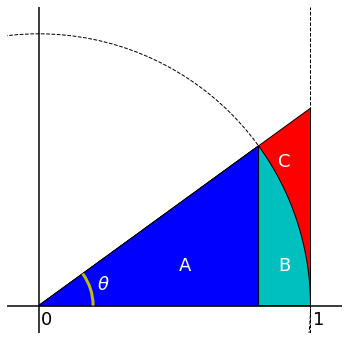

In [13]:
#@title
angle = np.pi/5
A_pos = [np.cos(angle), np.sin(angle)]

fig, ax = plt.subplots(figsize=(6, 6))

from functools import partial
ax_text = partial(ax.text, color="w", fontsize=18, zorder=4,
                  horizontalalignment='center', verticalalignment='center')

circle = plt.Circle((0, 0), 1,
                    zorder=0, facecolor='w', edgecolor='k', linestyle="--")
triangle1 = plt.Polygon([[0, 0], [1, np.tan(angle)], [1, 0]],
                        zorder=1, facecolor='r', edgecolor='k')
arc_points = np.array([[0, 0]] + [[np.cos(a), np.sin(a)] 
              for a in np.linspace(0, angle, 50)])
ax.fill(arc_points[:, 0], arc_points[:, 1],
        zorder=2, facecolor='c', edgecolor='k')
triangle2 = plt.Polygon([[0, 0], A_pos, [A_pos[0], 0]],
                        zorder=3, facecolor='b', edgecolor='k')
ax_text(2*np.cos(angle)/3, np.sin(angle)/4, "A")
ax_text((1+np.cos(angle))/2, np.sin(angle)/4, "B")
ax_text((1+np.cos(angle))/2, 0.9*np.sin(angle), "C")
ax_text(0.25*np.cos(angle/2), 0.25*np.sin(angle/2), r"$\theta$")
arc = mpl.patches.Arc([0, 0], 2*0.2, 2*0.2, theta1=0, theta2=angle*180/np.pi,
                      zorder=5, color='y', linewidth=3)
ax_text(0.03, -0.05, "0", color='k')
ax_text(1.03, -0.05, "1", color='k')

ax.axhline(y=0, color='k', zorder=4)
ax.axvline(x=0, color='k', zorder=4)
ax.axvline(x=1, color='k', zorder=4, linewidth=1, linestyle='--')
ax.axis('equal')
ax.axis([-0.1, 1.1, -0.1, 1.1])
ax.axis('off')
ax.add_artist(circle)
ax.add_artist(triangle1)
ax.add_artist(triangle2)
ax.add_patch(arc)
plt.show()

The circle is the unit circle (radius=1).

Assuming $0 < \theta < \dfrac{\pi}{2}$, the area of the blue triangle (area $\mathrm{A}$) is equal to its height ($\sin(\theta)$), times its base ($\cos(\theta)$), divided by 2. So $\mathrm{A} = \dfrac{1}{2}\sin(\theta)\cos(\theta)$.

The unit circle has an area of $\pi$, so the circular sector (in the shape of a pizza slice) has an area of A + B = $\pi\dfrac{\theta}{2\pi} = \dfrac{\theta}{2}$.

Next, the large triangle (A + B + C) has an area equal to its height ($\tan(\theta)$) multiplied by its base (1) divided by 2, so A + B + C = $\dfrac{\tan(\theta)}{2}$.

When $0 < \theta < \dfrac{\pi}{2}$, we have $\mathrm{A} < \mathrm{A} + \mathrm{B} < \mathrm{A} + \mathrm{B} + \mathrm{C}$, therefore:

$\dfrac{1}{2}\sin(\theta)\cos(\theta) < \dfrac{\theta}{2} < \dfrac{\tan(\theta)}{2}$

We can multiply all the terms by 2 to get rid of the $\dfrac{1}{2}$ factors. We can also divide by $\sin(\theta)$, which is stricly positive (assuming $0 < \theta < \dfrac{\pi}{2}$), so the inequalities still hold:

$cos(\theta) < \dfrac{\theta}{\sin(\theta)} < \dfrac{\tan(\theta)}{\sin(\theta)}$

Recall that $\tan(\theta)=\dfrac{\sin(\theta)}{\cos(\theta)}$, so the last term simplifies like so:

$cos(\theta) < \dfrac{\theta}{\sin(\theta)} < \dfrac{1}{\cos(\theta)}$

Since all these terms are strictly positive when $0 < \theta < \dfrac{\pi}{2}$, we can take their inverse and change the direction of the inequalities:

<hr />

**Inequalities (1)**

$\dfrac{1}{cos(\theta)} > \dfrac{\sin(\theta)}{\theta} > \cos(\theta)$

assuming $0 < \theta < \dfrac{\pi}{2}$
<hr />

Now since $\sin(-\theta)=-\sin(\theta)$, we see that $\dfrac{\sin(-\theta)}{-\theta}=\dfrac{\sin(\theta)}{\theta}$. Moreover, $\cos(-\theta)=\cos(\theta)$, and therefore $\dfrac{1}{\cos(-\theta)}=\dfrac{1}{\cos(\theta)}$. Replacing the terms in the inequalities (1), we get:

$\dfrac{1}{cos(-\theta)} > \dfrac{\sin(-\theta)}{-\theta} > \cos(-\theta)$

assuming $0 < \theta < \dfrac{\pi}{2}$

In other words, the inequalities (1) also hold for $-\dfrac{\pi}{2} < \theta < 0$:

<hr />

**Inequalities (2)**

$\dfrac{1}{cos(\theta)} > \dfrac{\sin(\theta)}{\theta} > \cos(\theta)$

assuming $-\dfrac{\theta}{2} < \theta < \dfrac{\pi}{2}$ and $\theta \neq 0$
<hr />

Since $\cos$ is a continuous function, $\underset{\theta \to 0}\lim\cos(\theta)=\cos(0)=1$. Similarly, $\underset{\theta \to 0}\lim\dfrac{1}{cos(\theta)}=\dfrac{1}{\cos(0)}=1$.

Since the inequalities (2) tell us that $\dfrac{\sin(\theta)}{\theta}$ is squeezed between $\dfrac{1}{cos(\theta)}$ and $\cos(\theta)$ when $\theta$ is close to 0, and since both of these approach 1 when $\theta$ approaches 0, we can use the **squeeze theorem** (also called the **sandwich theorem**) to conclude that $\dfrac{\sin(\theta)}{\theta}$ must also approach 1 when $\theta$ approaches 0.

<hr />

We have proven that:

$\underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta}=1$

<hr />

Now the second thing we need to prove before we can tackle the derivative of the $\sin$ function is the fact that $\underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta}=0$. Here we go:

$
\begin{split}
\underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta} && =  \underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta}\frac{\cos(\theta) + 1}{\cos(\theta) + 1} && \quad \text{ multiplying and dividing by }\cos(\theta)+1\\
&& =  \underset{\theta \to 0}\lim\dfrac{\cos^2(\theta) - 1}{\theta(\cos(\theta) + 1)} && \quad \text{ since }(a-1)(a+1)=a^2-1\\
&& =  \underset{\theta \to 0}\lim\dfrac{\sin^2(\theta)}{\theta(\cos(\theta) + 1)} && \quad \text{ since }\cos^2(\theta) - 1 = \sin^2(\theta)\\
&& =  \underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta}\dfrac{\sin(\theta)}{\cos(\theta) + 1} && \quad \text{ just rearranging the terms}\\
&& =  \underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta} \, \underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\cos(\theta) + 1} && \quad \text{ since the limit of a product is the product of the limits}\\
&& =  \underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\cos(\theta) + 1} && \quad \text{ since } \underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta}=1\\
&& =  \dfrac{0}{1+1} && \quad \text{ since } \underset{\theta \to 0}\lim\sin(\theta)=0 \text{ and } \underset{\theta \to 0}\lim\cos(\theta)=1\\
&& =  0\\
\end{split}
$

<hr />

We have proven that:

$\underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta}=0$

<hr />

With all that, we are finally ready to prove the fact that the derivative of the $\sin$ function is the $\cos$ function:

$
\begin{split}
f'(x) && = \underset{\theta \to 0}\lim\dfrac{f(x+\theta) - f(x)}{\theta} && \quad\text{by definition}\\
&& = \underset{\theta \to 0}\lim\dfrac{\sin(x+\theta) - \sin(x)}{\theta} && \quad \text{using }f(x) = \sin(x)\\
&& = \underset{\theta \to 0}\lim\dfrac{\cos(x)\sin(\theta) + \sin(x)\cos(\theta) - \sin(x)}{\theta} && \quad \text{since } cos(a+b)=\cos(a)\sin(b)+\sin(a)\cos(b)\\
&& = \underset{\theta \to 0}\lim\dfrac{\cos(x)\sin(\theta)}{\theta} + \underset{\theta \to 0}\lim\dfrac{\sin(x)\cos(\theta) - \sin(x)}{\theta} && \quad \text{since the limit of a sum is the sum of the limits}\\
&& = \cos(x)\underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta} + \sin(x)\underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta} && \quad \text{bringing out } \cos(x) \text{ and } \sin(x) \text{ since they don't depend on }\theta\\
&& = \cos(x)\underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta} && \quad \text{since }\underset{\theta \to 0}\lim\dfrac{\cos(\theta) - 1}{\theta}=0\\
&& = \cos(x) && \quad \text{since }\underset{\theta \to 0}\lim\dfrac{\sin(\theta)}{\theta}=1\\
\end{split}
$


### Cosine: $f(x)=\cos(x)$

Since we have proven that $\sin'(x)=\cos(x)$, proving that $\cos'(x)=-\sin(x)$ will be much easier.

$
\begin{split}
f'(x) && = \underset{\theta \to 0}\lim\dfrac{f(x+\theta) - f(x)}{\theta} && \quad\text{by definition}\\
&& = \underset{\theta \to 0}\lim\dfrac{\cos(x+\theta) - \cos(x)}{\theta} && \quad \text{using }f(x) = \cos(x)\\
&& = \underset{\theta \to 0}\lim\dfrac{\sin\left(x+\dfrac{\pi}{2}+\theta\right) - \sin\left(x+\dfrac{\pi}{2}\right)}{\theta} && \quad \text{since }\cos(x) = \sin\left(x+\dfrac{\pi}{2}\right)\\
&& = \underset{\theta \to 0}\lim\dfrac{\sin(z+\theta) - \sin(z)}{\theta} && \quad \text{using }z = x + \dfrac{\pi}{2}\\
&& = \sin'(z) && \quad \text{using the definition of }\sin'(z)\\
&& = \cos(z) && \quad \text{since we proved that }\sin'(z)=\cos(z)\\
&& = \cos\left(x + \dfrac{\pi}{2}\right) && \quad \text{using the definition of }z\\
&& = -\sin(x) && \quad \text{using this well-known rule of trigonometry}
\end{split}
$


### Tangent: $f(x) = \tan(x)$

Since $\tan(x)=\dfrac{\sin(x)}{\cos(x)}$, we can use the quotient rule to get:

$f'(x) = \dfrac{\sin'(x)\cos(x) - \sin(x)\cos'(x)}{\cos^2(x)}$

Since $\sin'(x)=\cos(x)$ and $\cos'(x)=-\sin(x)$, we get:

$f'(x) = \dfrac{\cos^2(x) + \sin^2(x)}{\cos^2(x)}$

And finally, since $\cos^2(x) + \sin^2(x) = 1$, we get:

$f'(x) = \dfrac{1}{\cos^2(x)}$
